# Step 1: create a sine signal with frequency 0.31 * 11245.5

In [23]:
import numpy as np
import matplotlib.pyplot as plt

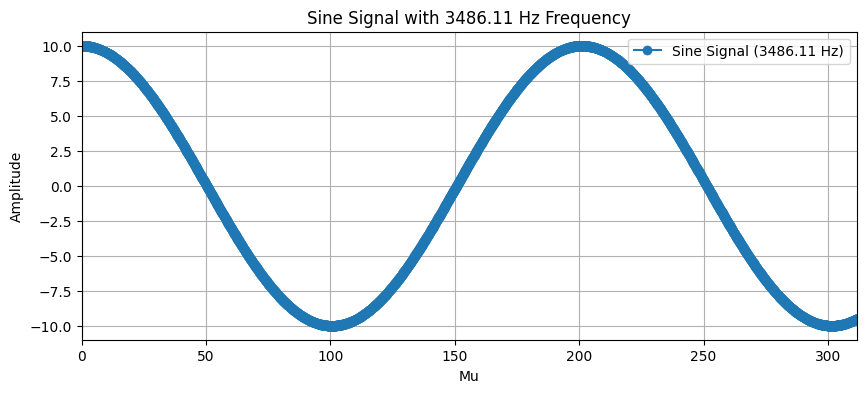

(0.0, 0.5)

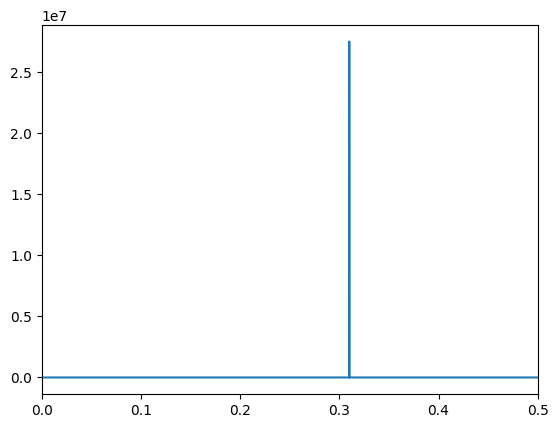

In [24]:
# Define parameters
revolution_frequency = 11245.5  # Hz
observation_points_per_turn = 550
desired_frequency = 0.31 * revolution_frequency

# Calculate the time for one complete turn
turn_duration = 1 / revolution_frequency

num_turns = 10000

# Turns
t = np.linspace(0, turn_duration*num_turns, observation_points_per_turn*num_turns, endpoint=False)
# Phase advance
mux = np.linspace(0, 62.31*num_turns, observation_points_per_turn*num_turns, endpoint=False)

# Generate sine signal
phase = np.pi/2.
signal = 10.0*np.sin(2 * np.pi * desired_frequency * t + phase)

# Plot the result
plt.figure(figsize=(10, 4))
plt.plot(mux, signal, label=f'Sine Signal ({desired_frequency:.2f} Hz)', marker='o')
plt.xlim(0,62.31*5)
plt.title(f'Sine Signal with {desired_frequency:.2f} Hz Frequency')
plt.xlabel('Mu')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

freqs = np.linspace(0, 1*observation_points_per_turn, len(signal))
plt.plot(freqs, abs(np.fft.fft(signal)))
plt.xlim(0, 0.5)

# Step 2: fit signal with sine and a sliding window

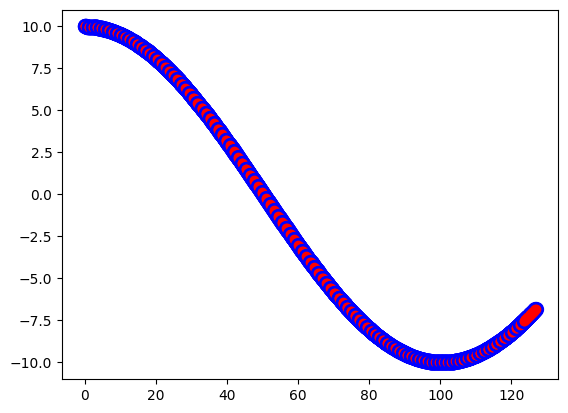

In [83]:
from scipy.optimize import curve_fit
def sine_function(x, amplitude, frequency, phase):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase)

i_start = 0   # from which turn to start
myrange = 30  # how many BPM points to include
i_end   = 550*2 #len(sine_signal)-myrange # until which turn
step    = 10   # step of the sliding window

amplitudes = []
phases = []
frequencies = []
for i in np.arange(i_start, i_end, step):
    
    mysignal = signal[i:i+myrange]
    myx = mux[i:i+myrange] #np.arange(0, len(mysignal))#t[i:i+myrange]
    
    initial_guess = [1,  0,0]
    fit_params, _ = curve_fit(sine_function, myx, mysignal, p0=initial_guess, maxfev=20000)

    plt.plot(myx, mysignal, c='b', ms=10, marker='o')
    plt.plot(myx, sine_function(myx, fit_params[0], fit_params[1], fit_params[2]), c='r', marker='o')
    
    #print(fit_params[0], fit_params[1]*62.31, fit_params[2]%np.pi)
    amplitudes.append(fit_params[0])
    frequencies.append(fit_params[1]*62.31)
    phases.append(fit_params[2]%np.pi)

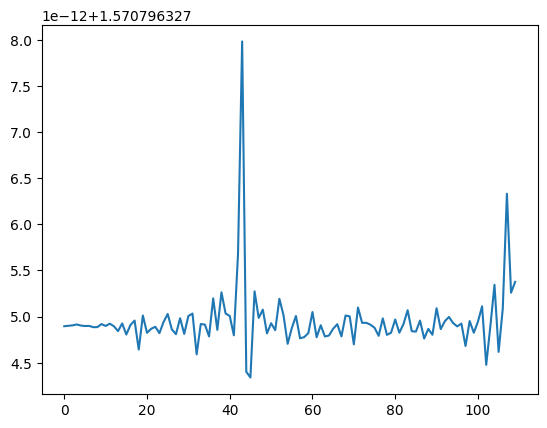

In [84]:
plt.plot(phases)

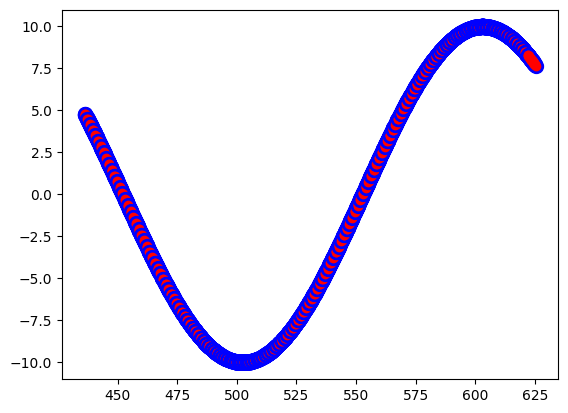

In [46]:
from scipy.optimize import curve_fit
def sine_function(x, amplitude, frequency, phase):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase)

i_start = 550*7   # from which turn to start
myrange = 30  # how many BPM points to include
i_end   = 550*10 #len(sine_signal)-myrange # until which turn
step    = 10   # step of the sliding window

amplitudes = []
phases = []
frequencies = []
for i in np.arange(i_start, i_end, step):
    
    mysignal = signal[i:i+myrange]
    myx = mux[i:i+myrange] #np.arange(0, len(mysignal))#t[i:i+myrange]
    
    initial_guess = [1,  0,0]
    fit_params, _ = curve_fit(sine_function, myx, mysignal, p0=initial_guess, maxfev=20000)

    plt.plot(myx, mysignal, c='b', ms=10, marker='o')
    plt.plot(myx, sine_function(myx, fit_params[0], fit_params[1], fit_params[2]), c='r', marker='o')
    
    #print(fit_params[0], fit_params[1]*62.31, fit_params[2]%np.pi)
    amplitudes.append(fit_params[0])
    frequencies.append(fit_params[1]*62.31)
    phases.append(fit_params[2]%np.pi)

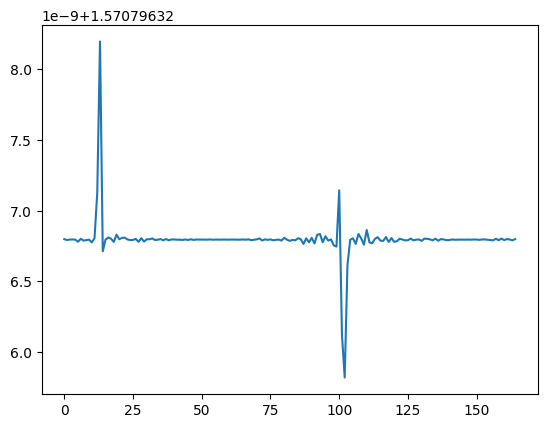

In [33]:
plt.plot(np.array(phases))

# Step 3: Break the sine signal in phase

In [61]:
# Generate sine signal
new_phase = np.pi/4.
new_frequency = 15.0
new_signal_noise = 0.05*np.sin(2 * np.pi * new_frequency * t + new_phase)

In [62]:
new_signal = signal.copy()
for i in range(len(t)):
    if i%550 ==0 and not i==0:
        #print(t[i], mux[i])
        new_signal[i:] += new_signal_noise[i:]
    

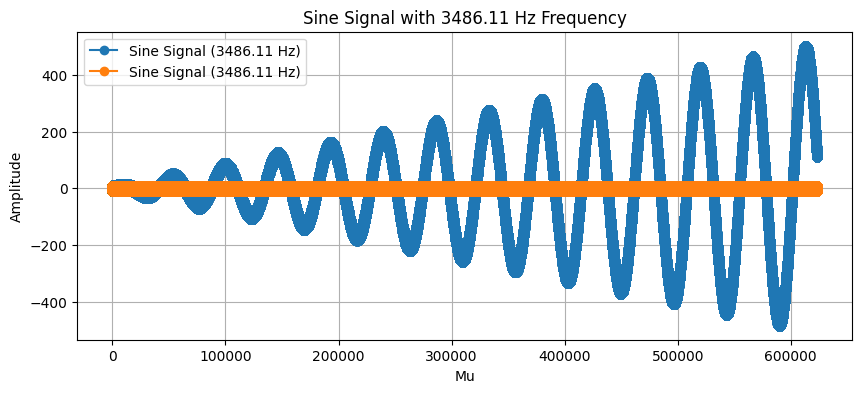

(0.0, 0.5)

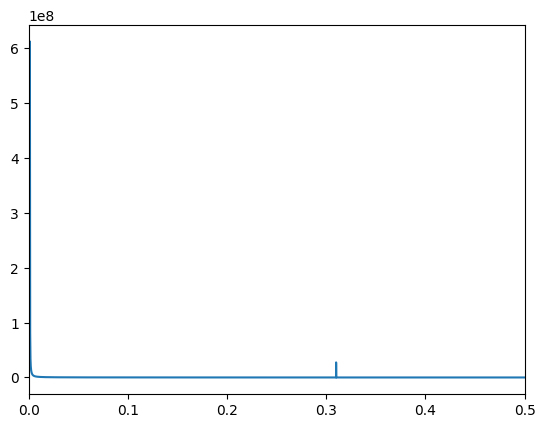

In [63]:
# Plot the result
plt.figure(figsize=(10, 4))
plt.plot(mux, new_signal, label=f'Sine Signal ({desired_frequency:.2f} Hz)', marker='o')
plt.plot(mux, signal, label=f'Sine Signal ({desired_frequency:.2f} Hz)', marker='o')
#plt.xlim(0,62.31*5)
plt.title(f'Sine Signal with {desired_frequency:.2f} Hz Frequency')
plt.xlabel('Mu')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.show()

freqs = np.linspace(0, 1*observation_points_per_turn, len(signal))
plt.plot(freqs, abs(np.fft.fft(new_signal)))
plt.xlim(0, 0.5)

/var/folders/gj/9f2g0rd15hx1l3bhlzwcxj780000gn/T/ipykernel_3769/917864880.py:2: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 0.5*11245.5)


(0.5175600168561023, 5622.75)

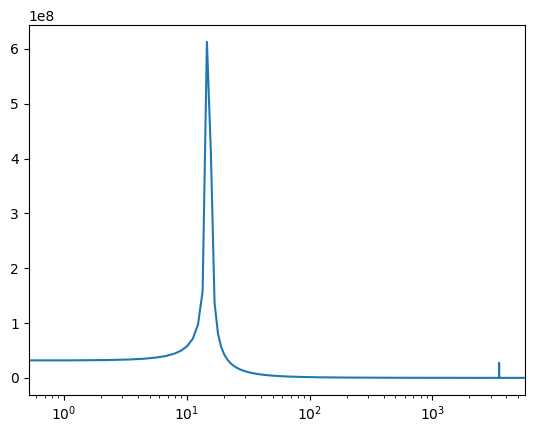

In [64]:
plt.semilogx(freqs*11245.5, abs(np.fft.fft(new_signal)))
plt.xlim(0, 0.5*11245.5)

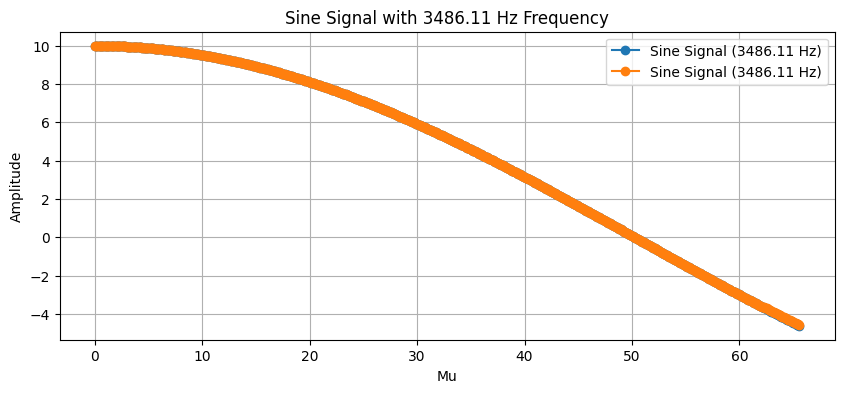

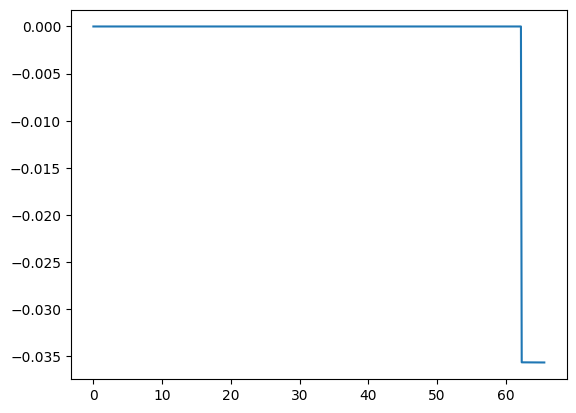

In [65]:
# Plot the result
a1 = 0
a2 = 580
plt.figure(figsize=(10, 4))
plt.plot(mux[a1:a2], signal[a1:a2], label=f'Sine Signal ({desired_frequency:.2f} Hz)', marker='o')
plt.plot(mux[a1:a2], new_signal[a1:a2], label=f'Sine Signal ({desired_frequency:.2f} Hz)', marker='o')
#plt.xlim(0,62.31*5)
#plt.ylim(-12, 12)
plt.title(f'Sine Signal with {desired_frequency:.2f} Hz Frequency')
plt.xlabel('Mu')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(mux[a1:a2], signal[a1:a2]-new_signal[a1:a2])

In [88]:
from scipy.optimize import curve_fit
def sine_function(x, amplitude, frequency, phase):
    return amplitude * np.sin(2 * np.pi * frequency * x + phase)

i_start = 0   # from which turn to start
myrange = 30  # how many BPM points to include
i_end   = len(signal)-myrange # until which turn
step    = 10   # step of the sliding window

amplitudes = []
phases = []
frequencies = []

amplitudes_broken = []
phases_broken = []
frequencies_broken = []
mytime = []

#fig, ax = plt.subplots()
#fig2, ax2 = plt.subplots()
for i in np.arange(i_start, i_end, step):

    #plt.sca(ax)
    mysignal = signal[i:i+myrange]
    myx = mux[i:i+myrange] #np.arange(0, len(mysignal))#t[i:i+myrange]
    
    initial_guess = [1,  0,0]
    fit_params, _ = curve_fit(sine_function, myx, mysignal, p0=initial_guess, maxfev=20000)

    ##plt.plot(myx, mysignal, c='b', ms=10, marker='o')
    ##plt.plot(myx, sine_function(myx, fit_params[0], fit_params[1], fit_params[2]), c='r', marker='o')
    
    #print(fit_params[0], fit_params[1]*62.31, fit_params[2]%np.pi)
    amplitudes.append(fit_params[0])
    frequencies.append(fit_params[1]*62.31)
    phases.append(fit_params[2]%np.pi)

    mysignal = new_signal[i:i+myrange]
    myx = mux[i:i+myrange] #np.arange(0, len(mysignal))#t[i:i+myrange]
    
    initial_guess = [1,  0,0]
    fit_params, _ = curve_fit(sine_function, myx, mysignal, p0=initial_guess, maxfev=20000)
    #plt.sca(ax2)

    ##plt.plot(myx, mysignal, c='b', ms=10, marker='o')
    ##plt.plot(myx, sine_function(myx, fit_params[0], fit_params[1], fit_params[2]), c='r', marker='o')
    
    #print(fit_params[0], fit_params[1]*62.31, fit_params[2]%np.pi)
    amplitudes_broken.append(fit_params[0])
    frequencies_broken.append(fit_params[1]*62.31)
    phases_broken.append(fit_params[2]%np.pi)
    mytime.append(mux[i])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 20000.

In [ ]:
len(phases)

ValueError: x and y must have same first dimension, but have shapes (6028,) and (110,)

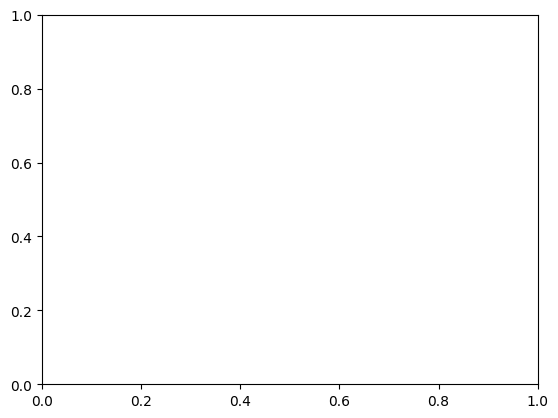

In [87]:
plt.plot(mytime, phases, marker='o', linestyle='--')
#plt.plot(mytime, phases_broken)
for i in range(1,10):
    plt.axvline(mux[550*i],c='k', linestyle='--', lw=0.5)

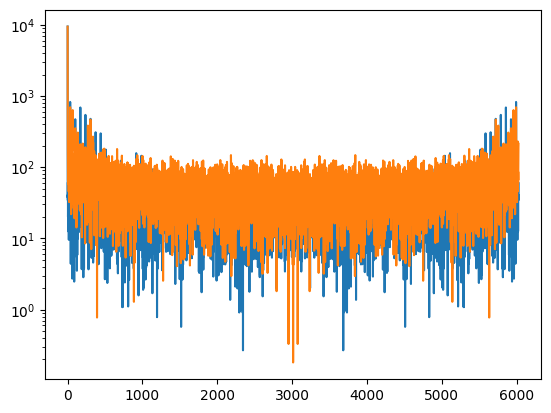

In [82]:
plt.semilogy(abs(np.fft.fft(phases)))
plt.semilogy(abs(np.fft.fft(phases_broken)))
#plt.ylim(0,40)

In [166]:
np.array(phases)%(np.pi)

array([1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
       1.57079633e+00, 1.57079633e+00, 1.57079633e+00, 1.57079633e+00,
      